### Base de dados ###

In [2]:

import pandas as pd

caminho = r"c:\Users\anton\Documents\tabela_clubes.csv"

df = pd.read_csv(caminho)


df.head()


FileNotFoundError: [Errno 2] No such file or directory: 'c:\\Users\\anton\\Documents\\tabela_clubes.csv'

In [3]:
df_2 = pd.read_csv(r"c:\Users\anton\Documents\receitas_do_futebol.csv")
df_2

,tipo,receita
0,Direitos de Tv e Premiações,3.000
1,Transferências de Atletas,1.400
2,Marketing,1.200
3,Bilheteria,0.599
4,Socio torcedor,0.505
5,Outras,0.360
6,Clube social,0.335


### Tratamento de dados ###

In [4]:
df = df.drop(df.columns[13:17], axis = 1)
print(df)

df = df[~df['Clubes'].isin(['Guarani', 'Nautico','Joinville', 'Prudente', 'Portuguesa', 'Santo Andre', 'Criciuma', 'Avai', "Coritiba", 'Figueirense' ])]


      Ano  Pos.        Clubes  Vitorias  Derrotas  Empates GolsF/S  Saldo  \
0    2017    18    America-MG        10        10       18   30:47    -17   
1    2017     7  Athletico-PR        16         9       13   54:37     17   
2    2017     6   Atletico-MG        17         8       13   56:43     13   
3    2017    11         Bahia        12        12       14   39:41     -2   
4    2017     9      Botafogo        13        12       13   38:46     -8   
..    ...   ...           ...       ...       ...      ...     ...    ...   
195  2008    18   Santo Andre        11         8       19   46:61    -15   
196  2008    12        Santos        12        13       13   58:58      0   
197  2008     3     Sao Paulo        18        11        9   57:42     15   
198  2008    20         Sport         7        10       21   48:71    -23   
199  2008    13       Vitoria        13         9       16   51:57     -6   

     Qtd_Jogadores Idade_Media  Estrangeiros  Valor_total  Media_Valor  
0 

### *Relações entre os times* ###

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

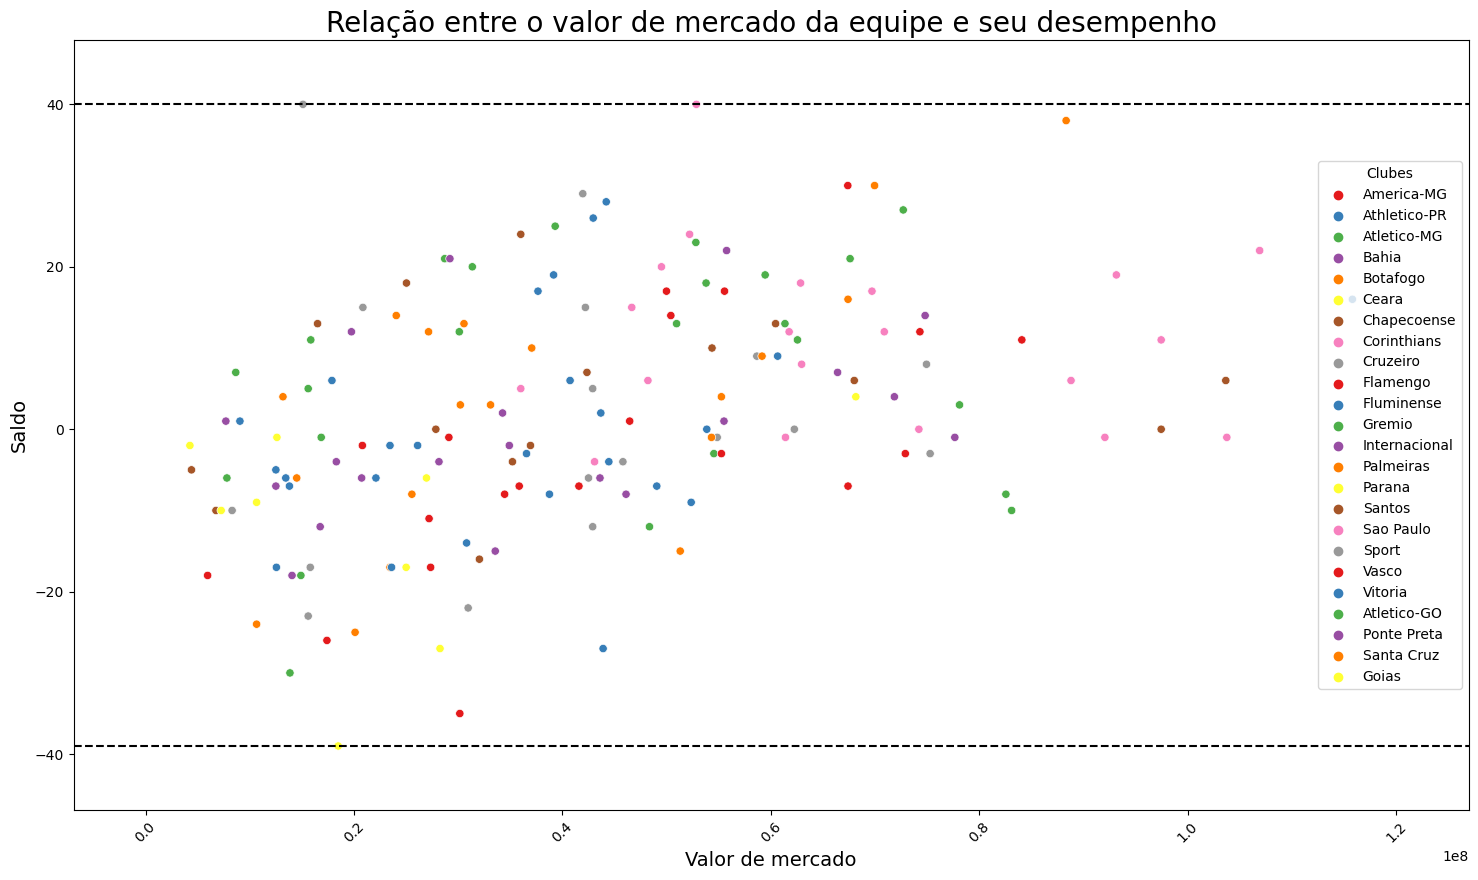

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


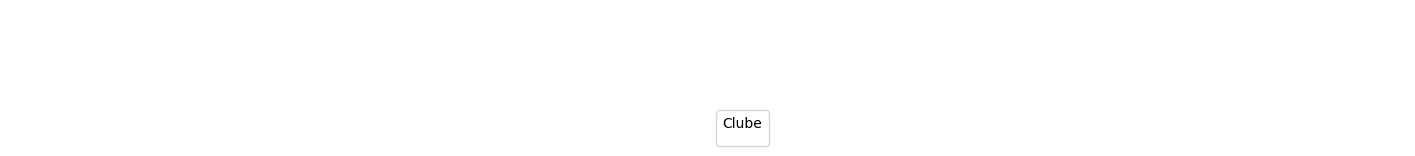

In [6]:
# Definir o tamanho da figura e aumentar a largura
plt.figure(figsize=(18, 10))

# Criar o gráfico de dispersão com cores diferentes para cada clube
scatterplot = sns.scatterplot(data=df, x='Valor_total', y='Saldo', hue='Clubes', palette='Set1')

# Aumentar a largura da margem entre os pontos do gráfico
plt.margins(0.1)

# Adicionar título e rótulos dos eixos
plt.title('Relação entre o valor de mercado da equipe e seu desempenho', fontsize=20)
plt.xlabel('Valor de mercado', fontsize=14)
plt.ylabel('Saldo', fontsize=14)

# Ajustar a orientação do eixo x
plt.xticks(rotation=45)

# Adicionar uma linha horizontal para separar o gráfico da legenda
plt.axhline(y=df['Saldo'].min(), color='black', linestyle='--')
plt.axhline(y=df['Saldo'].max(), color='black', linestyle='--')

# Mostrar o gráfico
plt.show()

# Criar um novo gráfico apenas para a legenda
plt.figure(figsize=(18, 1))

# Remover os eixos
plt.axis('off')

# Exibir a legenda abaixo do gráfico
plt.legend(title='Clube', fontsize=12, loc='upper left', bbox_to_anchor=(0.5, -0.2), ncol=5)

# Mostrar a legenda
plt.show()


In [10]:
df_4 = pd.read_csv(r"c:\Users\anton\Documents\valor_time.csv")
df_4

,Clube,Valor_2023,Valor_2024,%
0,palmeiras,159.95,220.25,37.7
1,flamengo,161.40,164.50,1.9
2,corinthians,88.15,113.80,29.1
3,fluminense,77.30,100.05,42.4
4,internacional,73.95,100.20,35.5
5,sao paulo,100.55,91.05,-9.4
6,atletico mineiro,84.90,88.70,4.5
7,gremio,58.70,77.50,32.0
8,bragantino,73.43,72.40,-1.4
9,botafogo,68.65,71.00,3.4


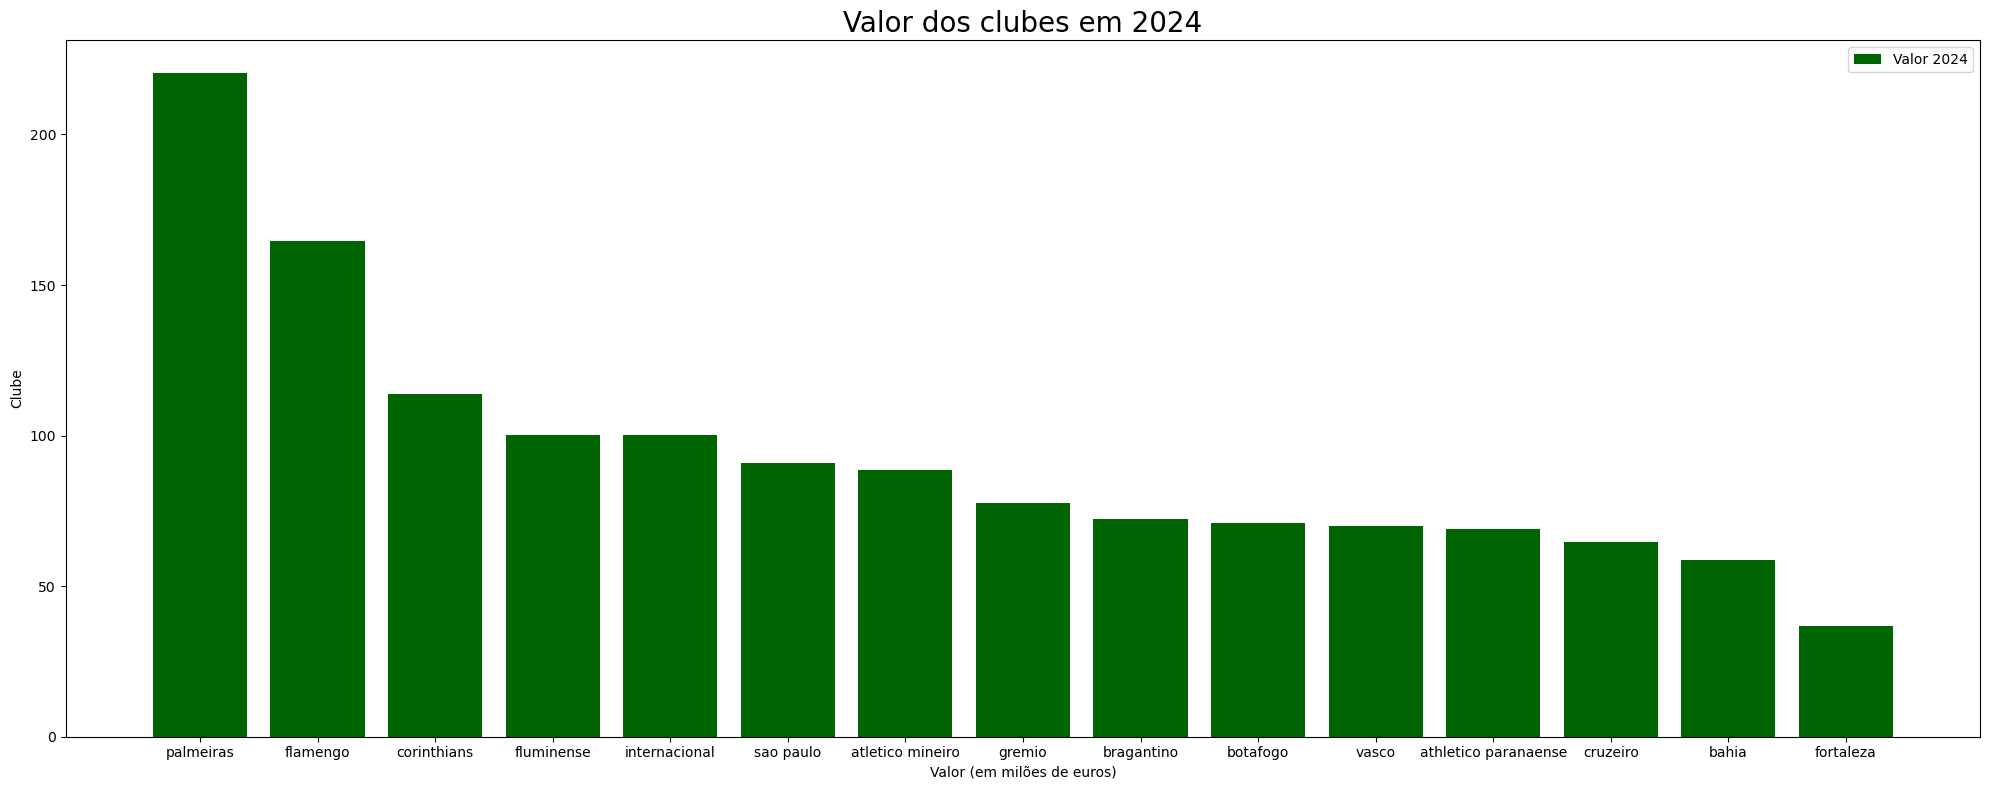

In [11]:
plt.figure(figsize=(20, 8))
plt.bar(df_4['Clube'], df_4['Valor_2024'], color='darkgreen', label='Valor 2024')
plt.xlabel('Valor (em milões de euros)')
plt.ylabel('Clube')
plt.title('Valor dos clubes em 2024', fontsize = 20)
plt.legend()
plt.tight_layout()
plt.show()

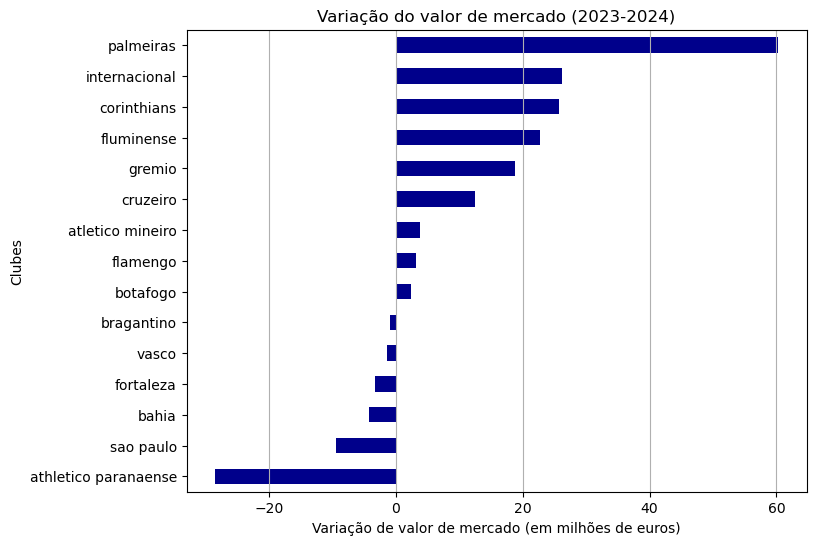

In [13]:
df_4['Variacao'] = df_4['Valor_2024'] - df_4['Valor_2023']
variacao = df_4.groupby('Clube')['Variacao'].mean()

plt.figure(figsize=(8,6))
variacao.sort_values().plot(kind='barh', color='darkblue')

plt.title('Variação do valor de mercado (2023-2024)')
plt.xlabel('Variação de valor de mercado (em milhões de euros)')
plt.ylabel('Clubes')
plt.grid(axis='x')
plt.show()
